In [1]:
# API jupyter notebook file

In [35]:
# Dependencies
import requests
import json
import pandas as pd
from pprint import pprint
import numpy as np

# World bank base url
url = "http://api.worldbank.org/v2/country/?format=json"

# create empty list to hold all countries
all_countries = []
income_levels = []
country_codes = []
lats = []
lngs = []
regions = []

# loop through 6 pages of countries, adding countries to our empty list as we go
for x in range(6):
    countries_response = requests.get(f"{url}&page={x+1}").json() 
    #import pdb; pdb.set_trace()
    countries = countries_response[1]
    for country in countries:
        all_countries.append(country["name"])
        income_levels.append(country["incomeLevel"]['value'])
        country_codes.append(country['id'])
        lats.append(country['latitude'])
        lngs.append(country['longitude'])
        regions.append(country['region']['value'])

# print lengths of lists to check validity
print(f'Length of countries: {len(all_countries)}\nLength of income_levels: {len(income_levels)}\nLength of country_code: {len(country_codes)}')
print(f'Length of lats: {len(lats)}\nLength of lngs: {len(lngs)}\nLength of lats: {len(lats)}\nLength of lngs: {len(lngs)}')
print(f'Length of regions: {len(regions)}')
countries_df = pd.DataFrame({
    "Country" : all_countries,
    "Income Lvl" : income_levels,
    "Country Code" : country_codes,
    "Lat" : lats,
    "Lng" : lngs,
    "Region" : regions
})

clean_df = countries_df.loc[countries_df["Region"] != "Aggregates", :]

clean_df.to_csv("clean_countries.csv", index=False)

clean_df.head(5)

len(clean_df)

Length of countries: 297
Length of income_levels: 297
Length of country_code: 297
Length of lats: 297
Length of lngs: 297
Length of lats: 297
Length of lngs: 297
Length of regions: 297


218

In [36]:
years = [2015, 2016,2017]

country_codes_test = clean_df['Country Code'][0:4]

for year in years:
    for code in country_codes_test:
        print(year,code)
        query_url = "http://api.worldbank.org/v2/country/" + code + "/indicator/NY.GDP.MKTP.CD?format=json&date=" + str(year)

2015 ABW
2015 AFG
2015 AGO
2015 ALB
2016 ABW
2016 AFG
2016 AGO
2016 ALB
2017 ABW
2017 AFG
2017 AGO
2017 ALB


In [37]:
# Practice some calls using specific countries... total population


def yr_calls(year):
    """function changes year in request call
    Args:
        year(int):This is the year for api call 
    Returns:
        gpds(list): This returns yearly gpd for each country code
    """
#     final_countries = []
#     final_codes = []
    gdps = []

    for code in clean_df["Country Code"]:

        #Build Query Url
        try:
            query_url = "http://api.worldbank.org/v2/country/" + code + "/indicator/NY.GDP.MKTP.CD?format=json&date=" + str(year) 
            response = requests.get(query_url).json()
            #import pdb; pdb.set_trace()
            gdps.append(response[1][0]["value"])
#             final_countries.append(response[1][0]['country']['value'])
#             final_codes.append(response[1][0]['countryiso3code'])


        except:
            print(f"{code}'s GDP was not found")
            gdps.append("0")
#             final_countries.append("0")
#             final_codes.append("0")


    print(json.dumps(response, indent=4))
    
    return gdps

In [38]:
# Using yr_calls function to return 2015 GDP as gdp_2015(list)

gdp_2015 = yr_calls(2015)

TWN's GDP was not found
[
    {
        "page": 1,
        "pages": 1,
        "per_page": 50,
        "total": 1,
        "sourceid": "2",
        "sourcename": "World Development Indicators",
        "lastupdated": "2021-04-26"
    },
    [
        {
            "indicator": {
                "id": "NY.GDP.MKTP.CD",
                "value": "GDP (current US$)"
            },
            "country": {
                "id": "ZW",
                "value": "Zimbabwe"
            },
            "countryiso3code": "ZWE",
            "date": "2015",
            "value": 19963120600,
            "unit": "",
            "obs_status": "",
            "decimal": 0
        }
    ]
]


In [39]:
#creating gdp dataframes
            
clean_df['2015 GDP'] = gdp_2015
clean_df.head()

C:\Users\jonat\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.99071e+10
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.16194e+11
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.13868e+10
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.78987e+09


In [40]:
# Using yr_calls function to return 2018 GDP as gdp_2018(list)
gdp_2016 = yr_calls(2016)

TWN's GDP was not found
[
    {
        "page": 1,
        "pages": 1,
        "per_page": 50,
        "total": 1,
        "sourceid": "2",
        "sourcename": "World Development Indicators",
        "lastupdated": "2021-04-26"
    },
    [
        {
            "indicator": {
                "id": "NY.GDP.MKTP.CD",
                "value": "GDP (current US$)"
            },
            "country": {
                "id": "ZW",
                "value": "Zimbabwe"
            },
            "countryiso3code": "ZWE",
            "date": "2016",
            "value": 20548678100,
            "unit": "",
            "obs_status": "",
            "decimal": 0
        }
    ]
]


In [41]:
# Adding gdp_YR(list) to clean_df 
clean_df['2016 GDP'] = gdp_2016
clean_df.head()

C:\Users\jonat\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09,2.96592e+09
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.99071e+10,1.80177e+10
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.16194e+11,1.01124e+11
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.13868e+10,1.18612e+10
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.78987e+09,2.89668e+09


In [42]:
# Using yr_calls function to return 2017 GDP as gdp_2017(list)
gdp_2017 = yr_calls(2017)

TWN's GDP was not found
[
    {
        "page": 1,
        "pages": 1,
        "per_page": 50,
        "total": 1,
        "sourceid": "2",
        "sourcename": "World Development Indicators",
        "lastupdated": "2021-04-26"
    },
    [
        {
            "indicator": {
                "id": "NY.GDP.MKTP.CD",
                "value": "GDP (current US$)"
            },
            "country": {
                "id": "ZW",
                "value": "Zimbabwe"
            },
            "countryiso3code": "ZWE",
            "date": "2017",
            "value": 22040902300,
            "unit": "",
            "obs_status": "",
            "decimal": 0
        }
    ]
]


In [43]:
# Adding gdp_YR(list) to clean_df 
clean_df['2017 GDP'] = gdp_2017
clean_df.head()

C:\Users\jonat\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09,2.96592e+09,3.05642e+09
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.99071e+10,1.80177e+10,1.88699e+10
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.16194e+11,1.01124e+11,1.22124e+11
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.13868e+10,1.18612e+10,1.30197e+10
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.78987e+09,2.89668e+09,3.00018e+09


In [44]:
# Using yr_calls function to return 2018 GDP as gdp_2018(list)
gdp_2018 = yr_calls(2018)

TWN's GDP was not found
[
    {
        "page": 1,
        "pages": 1,
        "per_page": 50,
        "total": 1,
        "sourceid": "2",
        "sourcename": "World Development Indicators",
        "lastupdated": "2021-04-26"
    },
    [
        {
            "indicator": {
                "id": "NY.GDP.MKTP.CD",
                "value": "GDP (current US$)"
            },
            "country": {
                "id": "ZW",
                "value": "Zimbabwe"
            },
            "countryiso3code": "ZWE",
            "date": "2018",
            "value": 24311560500,
            "unit": "",
            "obs_status": "",
            "decimal": 0
        }
    ]
]


In [45]:
# Adding gdp_YR(list) to clean_df 
clean_df['2018 GDP'] = gdp_2018
clean_df.head()

C:\Users\jonat\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP,2018 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09,2.96592e+09,3.05642e+09,None
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.99071e+10,1.80177e+10,1.88699e+10,1.83539e+10
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.16194e+11,1.01124e+11,1.22124e+11,1.01353e+11
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.13868e+10,1.18612e+10,1.30197e+10,1.5147e+10
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.78987e+09,2.89668e+09,3.00018e+09,3.21832e+09


In [46]:
# Using yr_calls function to return 2019 GDP as gdp_2019(list)
gdp_2019 = yr_calls(2019)

TWN's GDP was not found
[
    {
        "page": 1,
        "pages": 1,
        "per_page": 50,
        "total": 1,
        "sourceid": "2",
        "sourcename": "World Development Indicators",
        "lastupdated": "2021-04-26"
    },
    [
        {
            "indicator": {
                "id": "NY.GDP.MKTP.CD",
                "value": "GDP (current US$)"
            },
            "country": {
                "id": "ZW",
                "value": "Zimbabwe"
            },
            "countryiso3code": "ZWE",
            "date": "2019",
            "value": 21440758800,
            "unit": "",
            "obs_status": "",
            "decimal": 0
        }
    ]
]


In [47]:
# Adding gdp_YR(list) to clean_df 
clean_df['2019 GDP'] = gdp_2019
clean_df = clean_df.fillna(0)
clean_df.head()

C:\Users\jonat\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2019 GDP
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09,2.96592e+09,3.05642e+09,0,0
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.99071e+10,1.80177e+10,1.88699e+10,1.83539e+10,1.92911e+10
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.16194e+11,1.01124e+11,1.22124e+11,1.01353e+11,8.88157e+10
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.13868e+10,1.18612e+10,1.30197e+10,1.5147e+10,1.52792e+10
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.78987e+09,2.89668e+09,3.00018e+09,3.21832e+09,3.15406e+09


# Adam's Section

# Cheyenne Section

# Nathan Section

# Jonathan Section

In [48]:
j_url = "http://api.worldbank.org/v2/indicator?format=json"
indicator_response = requests.get(j_url).json()
indicator_names = []
for x in range(50):
    indicator_names.append(indicator_response[1][x]['name'])
indicator_names

['Poverty Headcount ($1.90 a day)',
 'Poverty Headcount ($2.50 a day)',
 'Middle Class ($10-50 a day) Headcount',
 'Official Moderate Poverty Rate-National',
 'Poverty Headcount ($4 a day)',
 'Vulnerable ($4-10 a day) Headcount',
 'Poverty Gap ($1.90 a day)',
 'Poverty Gap ($2.50 a day)',
 'Poverty Gap ($4 a day)',
 'Poverty Severity ($1.90 a day)',
 'Poverty Severity ($2.50 a day)',
 'Poverty Severity ($4 a day)',
 'Poverty Headcount ($1.90 a day)-Rural',
 'Poverty Headcount ($2.50 a day)-Rural',
 'Middle Class ($10-50 a day) Headcount-Rural',
 'Official Moderate Poverty Rate- Rural',
 'Poverty Headcount ($4 a day)-Rural',
 'Vulnerable ($4-10 a day) Headcount-Rural',
 'Poverty Gap ($1.90 a day)-Rural',
 'Poverty Gap ($2.50 a day)-Rural',
 'Poverty Gap ($4 a day)-Rural',
 'Poverty Severity ($1.90 a day)-Rural',
 'Poverty Severity ($2.50 a day)-Rural',
 'Poverty Severity ($4 a day)-Rural',
 'Access to electricity (% of total population)',
 'Total final energy consumption (TFEC)',
 'Lite

In [49]:
# define empty lists to append data to
populations = []
    
# run for loop, looping throug hall the country (codes) in our Countries DataFrame (named clean_df)
for code in clean_df["Country Code"]:

    #Build Query Url
    try:
        population_url = "http://api.worldbank.org/v2/country/" + code + "/indicator/SP.POP.TOTL?format=json" 
        pop_response = requests.get(population_url).json()
          #import pdb; pdb.set_trace()
            
          # append population values to list
        populations.append(int(pop_response[1][1]['value']))

    except (KeyError, TypeError):
        print(f"{code}'s Population Data was not found")
        populations.append(0)
        


ERI's Population Data was not found
TWN's Population Data was not found


In [75]:
# create new DataFrame to add populations
population_df = clean_df.copy()

# turn populations list into populations(100,000s) by dividing by a 100,000
divided_pops = [pop / 1000000 for pop in populations]

# add population data to DataFrame
population_df["2019 Population (millions)"] = divided_pops

population_df.head()
population_df["2019 Population (millions)"].max()

1397.715

In [52]:
# GET ELECTRCIITY ACCESS DATA FROM 2016
# define empty list to append data to 
elec_access = []

# run for loop, looping throug hall the country (codes) in our Countries DataFrame (named clean_df)
for code in clean_df["Country Code"]:

    #Build Query Url
    try:
        elec_url = "http://api.worldbank.org/v2/country/" + code + "/indicator/1.1_ACCESS.ELECTRICITY.TOT?format=json" 
        elec_response = requests.get(elec_url).json()
          #import pdb; pdb.set_trace()
            
          # append population values to list
        elec_access.append(int(elec_response[1][0]['value']))

    except (KeyError, TypeError):
        print(f"{code}'s Electricity-Access Data was not found")
        elec_access.append(0)
        
# GET POPULATION DATA FROM 2016 (to match electricity access data year)
# define empty lists to append data to
populations_2016 = []
    
# run for loop, looping throug hall the country (codes) in our Countries DataFrame (named clean_df)
for code in clean_df["Country Code"]:

    #Build Query Url
    try:
        population_url = "http://api.worldbank.org/v2/country/" + code + "/indicator/SP.POP.TOTL?format=json" 
        pop_response = requests.get(population_url).json()
          #import pdb; pdb.set_trace()
            
          # append population values to list
        populations_2016.append(int(pop_response[1][4]['value']))

    except (KeyError, TypeError):
        print(f"{code}'s 2016 Population Data was not found")
        populations_2016.append(0)

len(populations_2016)

ASM's Electricity-Access Data was not found
TWN's Electricity-Access Data was not found
VGB's Electricity-Access Data was not found
ERI's 2016 Population Data was not found
TWN's 2016 Population Data was not found


218

In [53]:
# add population data to DataFrame
population_df["2016 Population"] = populations_2016

# add electricity access % to populations DataFrame
population_df["Access to Electricity (2016)"] = elec_access

# format electricy column to be percent
population_df["Access to Electricity (2016)"] = population_df["Access to Electricity (2016)"].map("{:}%".format)

population_df.head()

,Country,Income Lvl,Country Code,Lat,Lng,Region,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2019 GDP,2019 Population,2016 Population,Access to Electricity (2016)
0,Aruba,High income,ABW,12.5167,-70.0167,Latin America & Caribbean,2.91955e+09,2.96592e+09,3.05642e+09,0,0,106314,104872,95%
1,Afghanistan,Low income,AFG,34.5228,69.1761,South Asia,1.99071e+10,1.80177e+10,1.88699e+10,1.83539e+10,1.92911e+10,38041754,35383128,84%
3,Angola,Lower middle income,AGO,-8.81155,13.242,Sub-Saharan Africa,1.16194e+11,1.01124e+11,1.22124e+11,1.01353e+11,8.88157e+10,31825295,28842484,40%
4,Albania,Upper middle income,ALB,41.3317,19.8172,Europe & Central Asia,1.13868e+10,1.18612e+10,1.30197e+10,1.5147e+10,1.52792e+10,2854191,2876101,100%
5,Andorra,High income,AND,42.5075,1.5218,Europe & Central Asia,2.78987e+09,2.89668e+09,3.00018e+09,3.21832e+09,3.15406e+09,77142,77297,100%


Text(0, 0.5, 'GDP (millions)')

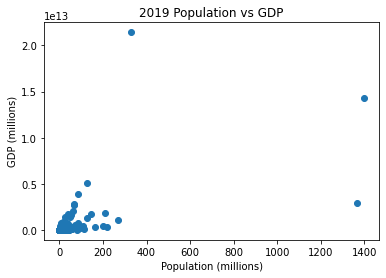

In [76]:
from matplotlib import pyplot as plt
# GDP vs Population analysis; can Population predict GDP?
pop = population_df["2019 Population (millions)"]
gdp = population_df["2019 GDP"]
plt.scatter(pop, gdp)
plt.title("2019 Population vs GDP")
plt.xlabel("Population (millions)")
plt.ylabel("GDP (millions)")

In [53]:


# turn 2016 populations list into populations(100,000s) by dividing by a 100,000
#divided_pops = [pop / 100000 for pop in populations_2016]

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')